# Interpolate

In [1]:
from smpl import plot
from smpl import stat
from smpl import interpolate
import numpy as np

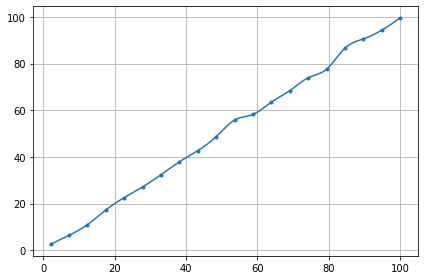

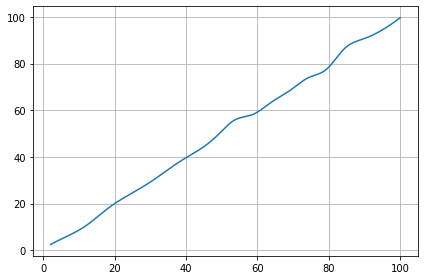

In [2]:
x = np.linspace(2,100,20)
y = stat.noisy(x)
plot.data(x,y,interpolate=True)
plot.show()
plot.data(x,y,interpolate=True,also_data=False)
plot.show()

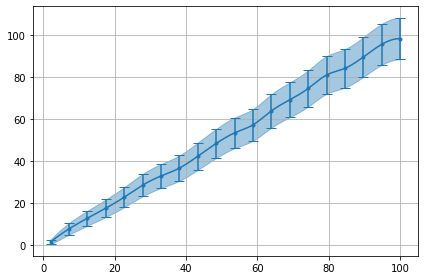

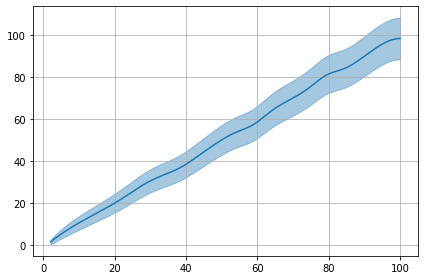

In [3]:
x = np.linspace(2,100,20)
y = stat.poisson_dist(stat.noisy(x))
plot.data(x,y,interpolate=True,sigmas=1,show=True)
plot.data(x,y,interpolate=True,sigmas=1,also_data=False)